In [3]:
import numpy as np
import matplotlib.pyplot as plt
import finesse
from finesse.analysis.actions import RunLocks
from finesse import ligo
from finesse.gaussian import BeamParam
from LLOF3FDS import make_LLO

finesse.configure(plotting=True)

In [4]:
LIGO = ligo.make_aligo(RF_AS_readout=False, verbose=True)

Lock('CARM_lock') REFL9_I -0.00010310899995708841
Lock('MICH_lock') POP45_Q 16.69737563119658
Lock('PRCL_lock') POP9_I -2.923409080736336
Lock('SRCL_lock') POP45_I -43.220106415336616
Lock('DARM_rf_lock') AS45_I -0.00339832744582408
Lock('DARM_dc_lock') AS_DC nan
Error Signal Residuals at Each Iteration (W):
                        DARM_rf_lock  
Iteration Number   0     -8.11e-19   
Error Signal Residuals at Each Iteration (W):
                        DARM_dc_lock  
Iteration Number   0     -1.13e-02   
Iteration Number   1     -7.25e-03   
Iteration Number   2     -4.23e-03   
Iteration Number   3     -2.31e-03   
Iteration Number   4     -1.21e-03   
Iteration Number   5     -6.24e-04   
Iteration Number   6     -3.17e-04   
Iteration Number   7     -1.60e-04   
Iteration Number   8     -8.07e-05   
Iteration Number   9     -4.06e-05   
Iteration Number   10    -2.04e-05   
Iteration Number   11    -1.02e-05   
Iteration Number   12    -5.15e-06   
Iteration Number   13    -2.58e-06

In [5]:
LLO = LIGO.deepcopy()
print(LLO.unparse())

regeneration of original KatScript for operations not implemented yet
regeneration of original KatScript for operations not implemented yet
regeneration of original KatScript for operations not implemented yet
regeneration of original KatScript for operations not implemented yet
regeneration of original KatScript for operations not implemented yet
regeneration of original KatScript for operations not implemented yet
regeneration of original KatScript for operations not implemented yet
regeneration of original KatScript for operations not implemented yet
regeneration of original KatScript for operations not implemented yet
regeneration of original KatScript for operations not implemented yet
regeneration of original KatScript for operations not implemented yet
regeneration of original KatScript for operations not implemented yet
regeneration of original KatScript for operations not implemented yet
regeneration of original KatScript for operations not implemented yet
regeneration of orig


# modulators for core interferometer sensing - Advanced LIGO, CQG, 2015
# http://iopscience.iop.org/article/10.1088/0264-9381/32/7/074001/meta#cqg507871s4-8
# 9MHz (CARM, PRC, SRC loops)
variable f1 9099471
variable f2 (5*&f1)
variable nsilica 1.45
variable Mloss 30u
###############################################################################
###   length definitions
###############################################################################
variable Larm 3994
variable LPR23 16.164  # distance between PR2 and PR3
variable LSR23 15.443  # distance between SR2 and SR3
variable LPR3BS 19.538 # distance between PR3 and BS
variable LSR3BS 19.366 # distance between SR3 and BS
variable lmich 5.342   # average length of MICH
variable lschnupp 0.08
variable lPRC ((3.5*299792458.0)/(2*&f1)) # T1000298 Eq2.1, N=3
variable lSRC ((17*299792458.0)/(2*&f2)) # T1000298 Eq2.2, M=3
###############################################################################
###   laser
#######################

In [6]:
removeElements = [
    "dbs OFI",
    "sq sqz db=6 angle=90.0",
    "obp OMC fc=0 bandwidth=1M filter_hom=[=0,0]",
    "pd Pas OMC.p2.o",
    "space sqz_p1__OFI_p2 portA=sqz.p1 portB=OFI.p2 auto_generated=true",
    "space SRMAR_p2__OFI_p1 portA=SRMAR.p2 portB=OFI.p1 auto_generated=true",
    "space OFI_p3__OMC_p1 portA=OFI.p3 portB=OMC.p1 auto_generated=true",
    "readout_dc AS    OMC.p2.o output_detectors=true",
    "lock DARM_dc_lock AS_DC DARM.DC -0.01 1e-6  disabled=false offset=20m"
]

unparsed = LIGO.unparse()
for ele in removeElements:
    unparsed = unparsed.replace(ele, '')

print(unparsed)

regeneration of original KatScript for operations not implemented yet
regeneration of original KatScript for operations not implemented yet
regeneration of original KatScript for operations not implemented yet
regeneration of original KatScript for operations not implemented yet
regeneration of original KatScript for operations not implemented yet
regeneration of original KatScript for operations not implemented yet
regeneration of original KatScript for operations not implemented yet
regeneration of original KatScript for operations not implemented yet
regeneration of original KatScript for operations not implemented yet
regeneration of original KatScript for operations not implemented yet
regeneration of original KatScript for operations not implemented yet
regeneration of original KatScript for operations not implemented yet
regeneration of original KatScript for operations not implemented yet
regeneration of original KatScript for operations not implemented yet
regeneration of orig


# modulators for core interferometer sensing - Advanced LIGO, CQG, 2015
# http://iopscience.iop.org/article/10.1088/0264-9381/32/7/074001/meta#cqg507871s4-8
# 9MHz (CARM, PRC, SRC loops)
variable f1 9099471
variable f2 (5*&f1)
variable nsilica 1.45
variable Mloss 30u
###############################################################################
###   length definitions
###############################################################################
variable Larm 3994
variable LPR23 16.164  # distance between PR2 and PR3
variable LSR23 15.443  # distance between SR2 and SR3
variable LPR3BS 19.538 # distance between PR3 and BS
variable LSR3BS 19.366 # distance between SR3 and BS
variable lmich 5.342   # average length of MICH
variable lschnupp 0.08
variable lPRC ((3.5*299792458.0)/(2*&f1)) # T1000298 Eq2.1, N=3
variable lSRC ((17*299792458.0)/(2*&f2)) # T1000298 Eq2.2, M=3
###############################################################################
###   laser
#######################

In [48]:
LLO = finesse.Model()
LLO.parse(unparsed)
LLO.parse(
    """
    s sSRM_FI SRMAR.p2 FI2.p1 0.7278
   
    ###########################################################################

    # (Loctions and angles based on the solid work file D1000342-v14 give ~5% 
    # mismatch. Thus lom1, lom3omc have been adjusted to get ~99.7% overlap at the OMC)

    # Distance SRM --> Faraday Isolator (FI)


    # Directional beam splitter (ideal Faraday Isolator with 4 ports)
    # ----------------------------------------------------------------
    # Description of node connections, inputNode --> outputNode
    # --
    # nFI2a (SRM)    --> nFI2c (OMC)
    # nFI2b (SQZ)    --> nFI2a (SRM)
    # nFI2c (OMC)    --> nFI2d (Unused)
    # nFI2d (Unused) --> nFI2b (SQZ)

    dbs FI2

    # Distance FI2 --> OM1  
    s sFI_OM1 FI2.p3 OM1.p1 2.9339

    # OM1
    bs OM1 T=800u L=&Mloss phi=0 alpha=2.251 Rc=4.6# T is set for high power; Loss is a guess

    # Distance OM1 --> OM2
    s sOM1_OM2 OM1.p2 OM2.p1 1.395 

    # OM2
    bs OM2 T=10u L=&Mloss phi=0 alpha=4.399 Rc=1.7058 # T is a guess

    # Distance OM2 --> OM3

    s sOM2_OM3 OM2.p2 OM3.p1 0.631
    bs OM3 T=10u L=&Mloss phi=0 alpha=30.037 # T is a guess

    # Distance OM3 --> OMC input coupler IC
    s sOM3_OMC OM3.p2 OMC_IC.p1 0.2034 # By design should be ~0.31

    ###########################################################################
    ### FTend FI

    ### FTblock OMC
    ###########################################################################
    # OMC (as built parameters: D1300507-v1)

    # Input Coupler IC (flat mirror)
    bs OMC_IC T=0.0076 L=10u phi=0 alpha=2.7609

    # Distance from IC to OC  
    s lIC_OC OMC_IC.p3 OMC_OC.p1 0.2815

    # Output Coupler OC (flat mirror)
    bs OMC_OC T=0.0075 L=10u phi=0 alpha=4.004

    # Distance from OC to CM1
    s lOC_CM1 OMC_OC.p2 OMC_CM1.p1 0.2842

    # Curved Mirror CM1
    bs OMC_CM1 T=36u L=10u phi=0 alpha=4.004 Rc=2.57321
    
    # Distance from CM1 to CM2 
    s lCM1_CM2 OMC_CM1.p2 OMC_CM2.p1 0.2815

    # Curved Mirror CM2
    bs OMC_CM2 T=35.9u L=10u phi=0 alpha=4.004 Rc=2.57369

    # Distance from CM2 to IC
    s lCM2_IC OMC_CM2.p2 OMC_IC.p4 0.2842

    ###########################################################################
    ### FTend OMC
#cav cavSRX SRM.p1.o ITMX.p1.i
#cav cavSRY SRM.p1.o ITMY.p1.i
#cav cavPRX PRM.p2.o ITMX.p1.i
#cav cavPRY PRM.p2.o ITMY.p1.i
cav cavOMC OMC_OC.p1.o
#cav cavFC FC1.p2.o

    ###########################################################################
    ### replace the elements that have been removed
    pd Pas OMC_OC.p3.o
    readout_dc AS OMC_OC.p3.o output_detectors=true
    lock DARM_dc_lock AS.outputs.DC DARM.DC -0.01 1e-6  disabled=false offset=20m
    
    ###########################################################################
    ### SQZ path FTblock squeezer
    
###########################################################################
## VOPO beam injected into SFI1
sq sqz db=3 angle=0
s lsqz1 sqz.p1 sqz_A_L1.p1 0
lens sqz_A_L1 0.05                ## Rc=100mm (T1900649 fig16)
s lsqz2 sqz_A_L1.p2 SF1.p2 0                        # injected at SF1 dbs node b

####### unused parameter value sources:
## q(VOPO at exit mirror): zo=2.291in = 0.0581914m after VOPO M1; zR=105.3mm
## len(VOPO-A_L1) = 9.212in (T1900649 Fig16) = 0.2339848m 
## len(A_L1-SF1) = 11.912-9.212in (T1900649 Fig16) = 0.06858m
###########################################################################
### FTend SQZ

### FTblock FC
###########################################################################
##path from SFI1    #injects & returns to SF1 dbs node a
s lSF1_AL2 SF1.p1 sqz_A_L2.p1 0.394716                  ## len(SF1-A_L2) = 27.452-11.912in (T1900649 Fig16) = 0.394716m
lens sqz_A_L2 75m                 ## Rc=150mm (T1900649 fig16)
s lAL2_AL3 sqz_A_L2.p2 sqz_A_L3.p1 0.03175                   ## len(A_L2-A_L3) = 28.702-27.452in (T1900649 Fig16) = 0.03175m
lens sqz_A_L3 175m                  ## Rc=350mm (T1900649 fig16)  
s lAL3_ZM1 sqz_A_L3.p2 ZM1.p1 0.25654                      ## len(A_L3-ZM1) 38.802-28.702in (T1900649 Fig16) = 0.25654m
bs ZM1 T=0 L=0 phi=0 alpha=0 #nZM1c nZM1d
s lZM1_2 ZM1.p2 ZM2.p1 1.499                     ## len(ZM2-ZM1) = 1.499m (T1900649 fig 7) [59" (D1900436 s3) = 1.4986m]
bs ZM2 T=0 L=0 phi=0 alpha=0 Rc=0.85 #nZM2c nZM2d Rc(ZM2) = 0.85m, concave (T1900649)
s lZM2_3 ZM2.p2 ZM3.p1 1.828                      ## len(ZM3-ZM2) = 1.828m (T1900649 fig 7) [72" (D1900436 s3) = 1.8288m]
bs ZM3 T=0 L=0 phi=0 alpha=0 #nZM3c nZM3d
s lZM3_FC ZM3.p2 FC1AR.p1 0.991                         ## len(FC1AR-ZM3) = 0.991m (T1900649 fig 7) [39" (D1900436 s3) = 0.9906m]

##filter cavity 
m FC1AR R=50e-6 L=3e-6 phi=0 Rc=-1                  ## FC1AR R_1064 <50ppm goal, <100ppm required, FC1AR Absorption_1064 <3ppm, R_532 same (E2000069)
## Rc(FC1AR) = 1m (E1900148) #Convex: CHECK SIGN
s FC1sub FC1AR.p2 FC1.p1 72.3e-3 nr=&n_silica        ## substrate_thickness(FC1) = 72.3mm (D1900148); 78mm blank (E1900147)
m FC1 T=1e-3 L=1e-6 phi=0                   ## FC1 T_1064 = 0.001, Absorption_1064 <1ppm, T_532 = match FC2_532, or 0.01 (E2000069)
s LFC FC1.p2 FC2.p1 297.85                            ## len(FC) = 297.85m (T1900649)
m FC2 T=2e-6 L=1e-6 phi=-0.0143884 Rc=531           ## FC2 T_1064 = 2-4ppm, Absorption_1064 <1ppm, T_532 = match FC1_532, or 0.01 (E2000070) #tuning set manually, = - 180/2F to match pole frequency
                                  ## Rc(FC2) = 531m (E1900149) #Concave: CHECK SIGN
s FC2sub FC2.p2 FC2AR.p1 72.3e-3 nr=&n_silica             ## substrate_thickness(FC2) = 72.3mm (D1900149) 78mm blank (E1900146)
m FC2AR R=50e-6 L=3e-6 phi=0 Rc=1                  ## FC2AR R_1064 <50ppm goal, <100ppm required; Absorption_1064 <3ppm, R_532 same (E2000070)
                                    ## Rc(FC2AR) = 1m (E1900149) #Convex: CHECK SIGN

####### unused parameter values & sources:
## len(ZM1-VOPO) = 6.23" (D1900436 s3) = 158.242mm 
## tot_len(FC1AR-ZM3-ZM2) = 111" (D1900436 s3) = 2.8194m
## tot_len(ZM2-ZM1-VOPO) = 65.23" (D1900436 s3) = 1.656842m
## aperture_diameter(FC1) = 150.75mm (D1900148); 153mm blank (E1900147)
## clear_aperture_diameter(FC1) = 120mm (E1900147)
## aperture_diameter(FC2) = 150.75mm (D1900149) 153mm blank (E1900146)
## clear_aperture_diameter(FC2) = 120mm (E1900146)
###########################################################################
### FTend FC

### FTblock SFI
###########################################################################
## path from SFI1 to OFI (includes SFI2)
dbs SF1                        # squeezer faraday 1
s lSF1_BL1 SF1.p3 sqz_B_L1.p1 0.2286                      ## len(SF1-B_L1) = 35.890-26.890in (T1900649 Fig17)  = 0.2286m
lens sqz_B_L1 175                       ## Rc=350mm (T1900649 fig17)
s lBL1_SF2 sqz_B_L1.p2 SF2.p1 0                              ## SF2 location non-critical
dbs SF2                      # squeezer faraday 2
s lSF2_BL2 SF2.p3 sqz_B_L2.p1 0.6731                         ## len(B_L1-B_L2) = 62.390-35.890in (T1900649 Fig17) = 0.6731m
lens sqz_B_L2 250m                      ## Rc=500mm (T1900649 fig17)
s lBL2_ZM4 sqz_B_L2.p2 ZM4.p1 1.21285                        ## len(B_L2-ZM4) = 110.140-62.390in (T1900649 Fig17) = 1.21285 m                   
bs ZM4 T=0 L=0 phi=0 alpha=0 Rc=-13.33 #nZM4c nZM4d
                                  ## Rc(ZM4) = 13.33m, convex (T1900649)
s lZM4_5 ZM4.p2 ZM5.p1 1.681226                      ## len(ZM5-ZM4) = 66.19" (D1900436 s3) = 1.681226m
bs ZM5 T=0 L=0 phi=0 alpha=0 Rc=3.4 #nZM5c nZM5d
                                     ## Rc(ZM5) = 3.4m, concave (T1900649)
s lZM5_6 ZM5.p2 ZM6.p1 4.689856                       ## len(ZM6-ZM5) = 184.64" (D1900436 s3) = 4.689856m
bs ZM6 T=0 L=0 phi=0 alpha=59 #nZM6c nZM6d ## ZM6_alpha = 118deg/2 (D1900436 s2)
s lZM6_OFI ZM6.p2 FI2.p2 0.0348488                   ## len(ZM6-OFI) = 8.926-7.554m (T1900649 Fig12) = 0.0348488m    


    ###########################################################################
    
    variable n_silica 1.44963098985906
    pd pdtest  FI2.p1
    ###########################################################################
    ### pendulum for QRPN
    variable Mitmy 39.420 
    variable Metmy 39.642
    variable Mitmx 39.603
    variable Metmx 39.508
    
    pendulum itmx_sus ITMX.mech mass=&Mitmx fz=1 Qz=1M
    pendulum etmx_sus ETMX.mech mass=&Metmx fz=1 Qz=1M
    pendulum itmy_sus ITMY.mech mass=&Mitmy fz=1 Qz=1M
    pendulum etmy_sus ETMY.mech mass=&Metmy fz=1 Qz=1M
""")

LLO = make_LLO(LLO)

In [49]:
LLOQNLS = LLO.deepcopy()

LLOQNLS.parse("""
fsig(1)
sgen darmx LX.h
sgen darmy LY.h phase=180

# Output the full quantum noise limited sensitivity
qnoised qnoise OMC_OC.p3.o nsr=True
xaxis(darmx.f, log, 5, 5k, 100, pre_step=run_locks(method='newton', display_progress=false))
""")

outLLO = LLOQNLS.run()

In [50]:
outLLO['pdtest']

array([0.34881889, 0.34881889, 0.34881889, 0.34881889, 0.34881889,
       0.34881889, 0.34881889, 0.34881889, 0.34881889, 0.34881889,
       0.34881889, 0.34881889, 0.34881889, 0.34881889, 0.34881889,
       0.34881889, 0.34881889, 0.34881889, 0.34881889, 0.34881889,
       0.34881889, 0.34881889, 0.34881889, 0.34881889, 0.34881889,
       0.34881889, 0.34881889, 0.34881889, 0.34881889, 0.34881889,
       0.34881889, 0.34881889, 0.34881889, 0.34881889, 0.34881889,
       0.34881889, 0.34881889, 0.34881889, 0.34881889, 0.34881889,
       0.34881889, 0.34881889, 0.34881889, 0.34881889, 0.34881889,
       0.34881889, 0.34881889, 0.34881889, 0.34881889, 0.34881889,
       0.34881889, 0.34881889, 0.34881889, 0.34881889, 0.34881889,
       0.34881889, 0.34881889, 0.34881889, 0.34881889, 0.34881889,
       0.34881889, 0.34881889, 0.34881889, 0.34881889, 0.34881889,
       0.34881889, 0.34881889, 0.34881889, 0.34881889, 0.34881889,
       0.34881889, 0.34881889, 0.34881889, 0.34881889, 0.34881

In [51]:
np.save("./strain_sensitivityF3FDS.npy", outLLO["qnoise"].real) 

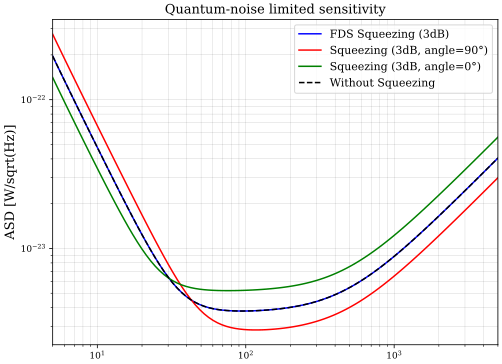

In [52]:
# strain_sensitivityF3WithoutSQZ = np.load("./strain_sensitivityF3WithoutSQZ.npy")
# strain_sensitivityF2WithoutSQZ = np.load("./F2 code/strain_sensitivityF2WithoutSQZ.npy")
# strain_sensitivityF2WithSQZ = np.load("./F2 code/strain_sensitivityF2WithSQZ.npy") 
strain_sensitivityF3WithSQZ = np.load("./strain_sensitivityF3WithSQZ.npy") 
strain_sensitivityF3WithSQZPhase0 = np.load("./strain_sensitivityF3WithSQZPhase0.npy") 
strain_sensitivityF3FDS = np.load("./strain_sensitivityF3FDS.npy") 
strain_sensitivityF3WithoutSQZ = np.load("./strain_sensitivityF3WithoutSQZ.npy")


fig,ax =plt.subplots(1,1,figsize=(8,6))

ax.loglog(outLLO.x[0], strain_sensitivityF3FDS, label='FDS Squeezing (3dB)')
ax.loglog(outLLO.x[0], strain_sensitivityF3WithSQZ, 'r-', label="Squeezing (3dB, angle=90°)")
ax.loglog(outLLO.x[0], strain_sensitivityF3WithSQZPhase0, 'g-', label="Squeezing (3dB, angle=0°)")
ax.loglog(outLLO.x[0], strain_sensitivityF3WithoutSQZ, 'k--', label="Without Squeezing")


# ax[0].loglog(outLLO.x[0], strain_sensitivityF3WithoutSQZ,'k', label='F3 without Squeezing')
# ax[0].loglog(outLLO.x[0], strain_sensitivityF2WithoutSQZ, 'g--', label="F2 without Squeezing")
ax.set_ylabel("ASD [W/sqrt(Hz)]", fontsize=13)
ax.set_title("Quantum-noise limited sensitivity", fontsize=13)
ax.legend(loc = 'best', fontsize=11);

# ax[1].loglog(outLLO.x[0], np.abs(strain_sensitivityF3WithSQZ-strain_sensitivityF2WithSQZ), 'b', label='With Squeezing')
# ax[1].loglog(outLLO.x[0], np.abs(strain_sensitivityF3WithoutSQZ-strain_sensitivityF2WithoutSQZ), 'r--', label='Without Squeezing')
# ax[1].legend(loc = 'best', fontsize=11)

# ax[1].set_ylabel("The difference", fontsize=13)
# ax[1].set_xlabel("fsig.f [Hz]", fontsize=13);
# fig.savefig('./strain_sensitivityF2and3.pdf')


In [50]:
strain_sensitivityF3FDS.mean()/strain_sensitivityF3FDS.max()

0.11119304732582343

In [55]:
strain_sensitivityF3FDS.mean()/strain_sensitivityF3FDS.max()

0.11119437218950484